# Dataset Generator for regressions

This notebook is used to generate dataset for regressions.

## Testing Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [476]:
mu, sigma = 2, 2 # mean and standard deviation
s = np.random.normal( mu, sigma , 3000 )
s = 5 * ( s + abs(min(s)) ) / ( max(s) - min(s) )
s = s.round(0)
s = np.where(s == max(s), min(s), s) 
s = np.where(s == max(s), min(s), s) 

In [477]:
print(s)
print(stats.mode(s))
print(max(s))
print(min(s))

[3. 3. 2. ... 3. 2. 2.]
ModeResult(mode=array([2.]), count=array([1225]))
3.0
0.0


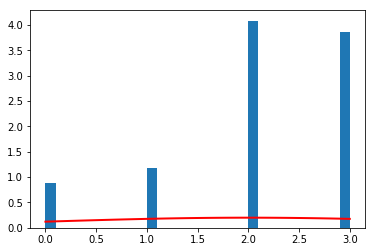

In [478]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
linewidth = 2, color='r')
plt.show()

In [15]:
round(np.random.uniform(0,1),0)

1.0

## Definition of mathematical functions to generate relationships between features and target

In [2]:
def eval_line(x, f, r):
    '''
    Function to generate an imperfect line
    x: The point of evaluation
    f: The function defined like a tuple (m, b) of m*x + b
    r: The grade of the imperfection [-r,r]
    returns m*x + b +- r
    '''
    m,b = f
    return m*x + b + np.random.uniform(-r,r)

In [41]:
eval_line(5,(1,0),0.1)

4.962723793493029

In [3]:
def eval_parable(x, f, r):
    '''
    Function to generate an imperfect parable
    x: The point of evaluation
    f: The function defined like a tuple (m1, m2, b) of m1*x**2 + m2*x + b
    r: The grade of the imperfection [-r,r]
    returns m1*x**2 + m2*x + b +- r
    '''
    m1, m2, b = f
    return m1*x**2 + m2*x + b + np.random.uniform(-r,r)

In [53]:
eval_parable(3,(1,1,0),0.1)

11.97792312999321

In [4]:
def eval_tri_pol(x, f, r):
    '''
    Function to generate an imperfect parable
    x: The point of evaluation
    f: The function defined like a tuple (m1, m2, m3, b) of m1*x**3 + m2*x**2 + m3*x + b
    r: The grade of the imperfection [-r,r]
    returns m1*x**3 + m2*x**2 + m3*x + b +- r
    '''
    m1, m2, m3, b = f
    return m1*x**3 + m2*x**2 + m3*x + b + np.random.uniform(-r,r)

In [61]:
eval_tri_pol(1,(1,1,1,0),0.1)

3.0027308642218404

In [5]:
def eval_log(x, f, r):
    '''
    Function to generate an imperfect logarithm base 10
    x: The point of evaluation
    f: The function defined like a tuple (m1, m2, b) of m1*log(m2*x) + b
    r: The grade of the imperfection [-r,r]
    returns m1*log(m2*x) + b +- r
    '''
    m1, m2, b = f
    return m1*np.log10(m2*x) + b + np.random.uniform(-r,r)

In [135]:
eval_log(3,(1,1,0),0.1)

0.5322026907858992

In [5]:
def eval_sigmoid(x, f, r):
    '''
    Function to generate an imperfect sigmoid 
    x: The point of evaluation
    f: The function defined like a tuple (m1, m2, b) of m1/(1 + e**-m2*x) + b
    r: The grade of the imperfection [-r,r]
    returns m1/(m2 + e**-x) + b +- r
    '''    
    m1, m2, b = f
    return m1/(1 + np.exp(-m2*x) )+ b + np.random.uniform(-r,r)

In [154]:
eval_sigmoid(100,(1,1,0),0.1)

1.0

In [6]:
def eval_sin(x, f, r):
    '''
    Function to generate an imperfect sin 
    x: The point of evaluation
    f: The function defined like a tuple (m1, m2, b) of m1*sin(m2*x) + b
    r: The grade of the imperfection [-r,r]
    returns m1/(m2 + e**-x) + b +- r
    '''    
    m1, m2, b = f
    return m1*np.sin(m2*x) + b + np.random.uniform(-r,r)

In [256]:
eval_sigmoid(100,(1,1,0),0.1)

1.0596390596980396

In [99]:
np.mean( [eval_parable(5,(1,1,0),0.1) , eval_log(5,(1,1,0),0.1)])

15.331423124029739

## Testing a function

In [664]:
x = [ num for num in range(1,270) ]

In [671]:
y = [ np.mean( [  eval_sigmoid(num,(270,4/270,0),1)]) for num in x]

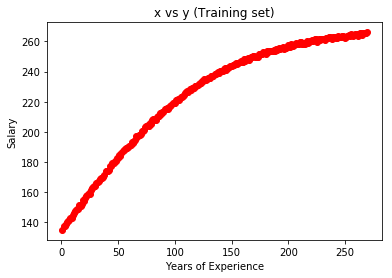

In [673]:
plt.scatter(x, y, color = 'red')
#plt.plot(x, y, color = 'blue')
plt.title('x vs y (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Defining the Independent Vairiables

In [7]:
indep = {
    'EDAD': (34,5, [lambda s: s.round(0)]) ,
    'GENERO': (0.55,0.1, [lambda s: s.round(0)]),  # Round (0)
    'RESIDENCIA': (2,2, [lambda s : 4 * (s + abs(min(s))) / ( max(s) - min(s) ), lambda s: s.round(0), lambda s: np.where(s== max(s), min(s), s), lambda s: np.where(s== max(s), min(s), s)]),   # s = np.where(s== max(s), min(s), s) <= Round(0)  <= s = 3 * (s + abs(min(s))) / ( max(s) - min(s) ) (BR, AR, MX)
    'NV_ESTUDIO': (2,2, [lambda s : 4 * (s + abs(min(s))) / ( max(s) - min(s) ), lambda s: s.round(0), lambda s: np.where(s== max(s), min(s), s)]), # s = np.where(s== max(s), min(s), s) <= Round(0)  <= s = 4 * (s + abs(min(s))) / ( max(s) - min(s) ) (HS, TE, UN, PS)
    'ESTUDIO_PREV': (2,2, [lambda s : 6 * (s + abs(min(s))) / ( max(s) - min(s) ), lambda s: s.round(0), lambda s: np.where(s== max(s), min(s), s)]), # s = np.where(s== max(s), min(s), s) <= Round(0)  <= s = 6 * (s + abs(min(s))) / ( max(s) - min(s) ) (BU, COM, DEV, ENG, MK, O)
    #'EXPERIENCIA': (6,1.5, [lambda s: s.round(0)]), # Round (0)
    'TRACK_DH': (2,2, [lambda s : 5 * (s + abs(min(s))) / ( max(s) - min(s) ), lambda s: s.round(0), lambda s: np.where(s== max(s), min(s), s), lambda s: np.where(s== max(s), min(s), s)]), # s = np.where(s== max(s), min(s), s) <= Round(0)  <= s = 4 * (s + abs(min(s))) / ( max(s) - min(s) ) (MK, EX, PR, DT)
    'AVG_DH' : (3.5, 0.4, [lambda s: s.round(1)]) # Round (1)
        }

EDAD (34, 5, [<function <lambda> at 0x7fed41e760d0>])


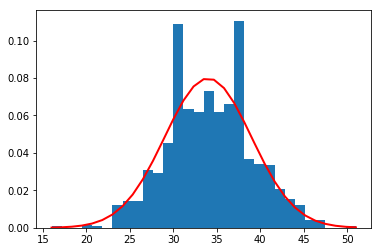

GENERO (0.55, 0.1, [<function <lambda> at 0x7fed41e55950>])


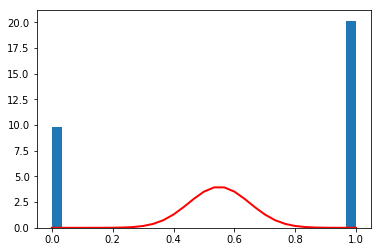

RESIDENCIA (2, 2, [<function <lambda> at 0x7fed4144de18>, <function <lambda> at 0x7fed413b6620>, <function <lambda> at 0x7fed41e8e7b8>, <function <lambda> at 0x7fed41e8e730>])


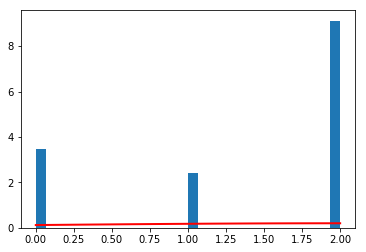

NV_ESTUDIO (2, 2, [<function <lambda> at 0x7fed41e8e6a8>, <function <lambda> at 0x7fed41e8e840>, <function <lambda> at 0x7fed41e8e8c8>])


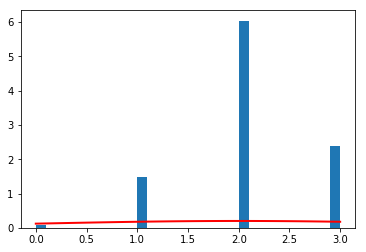

ESTUDIO_PREV (2, 2, [<function <lambda> at 0x7fed41e8e950>, <function <lambda> at 0x7fed41e8e9d8>, <function <lambda> at 0x7fed41e8ea60>])


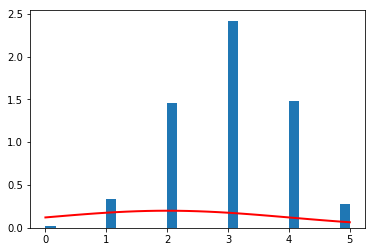

TRACK_DH (2, 2, [<function <lambda> at 0x7fed41e8eae8>, <function <lambda> at 0x7fed41e8eb70>, <function <lambda> at 0x7fed41e8ebf8>, <function <lambda> at 0x7fed41e8ec80>])


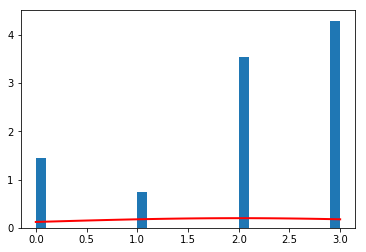

AVG_DH (3.5, 0.4, [<function <lambda> at 0x7fed41e8ed08>])


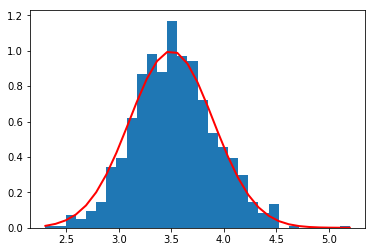

In [8]:
dataset = pd.DataFrame()
size = 1000
for name, stats in indep.items():
    print (name,stats)
    mu, sigma, functions = stats 
    s = np.random.normal( mu , sigma , size )
    if functions is not None:
        for func in functions:
            s = func(s)
    
    
    dataset[name] =  s
    count, bins, ignored = plt.hist(s, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')
    plt.show()

In [10]:
dataset.head()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH
0,30.0,1.0,0.0,1.0,4.0,2.0,3.4
1,31.0,1.0,0.0,2.0,5.0,3.0,3.7
2,37.0,0.0,0.0,2.0,4.0,3.0,3.3
3,42.0,1.0,2.0,1.0,3.0,2.0,3.5
4,32.0,1.0,2.0,1.0,4.0,2.0,4.0


In [ ]:
#eval_parable(3,(1,1,0),0.1)

## Definig the dependent variable

In [9]:
depend = {
    'MINUTES_DH': [(eval_parable, 'AVG_DH', (300,90,50), 100, lambda s: s.round(1)), (eval_sin, 'AVG_DH', (900,2.5,0), 10, lambda s: s.round(1))],
    'EXPERIENCIA': [(eval_line, 'EDAD', (-0.285,24.25), 1, lambda s: s.round(1)), (eval_sin, 'EDAD', (-20,0.095,0), 1, lambda s: abs(s.round(1)))] #(6,1.5, [lambda s: s.round(0)]), # Round (0)
}

In [10]:
for name, relations in depend.items():
    #print(name,relations)
    y = np.array([])
    for rela in relations:
        f, x, t, r, lam = rela
        if len(y) == 0:
            print(f"First time for {name}")
            y = np.array([f(num,t,r) for num in dataset[x]])
        else:
            y = y + np.array([f(num,t,r) for num in dataset[x]])
        
        if lam is not None:
            y = lam(y)
    
    dataset[name] = y

First time for MINUTES_DH
First time for EXPERIENCIA


In [11]:
dataset.head()
#min(dataset['EXPERIENCIA'])

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA
0,43.0,1.0,2.0,3.0,3.0,3.0,3.8,4557.9,28.7
1,42.0,0.0,0.0,2.0,4.0,2.0,3.5,4656.2,25.6
2,35.0,0.0,2.0,2.0,2.0,3.0,4.0,4695.2,19.0
3,35.0,1.0,1.0,1.0,2.0,0.0,4.1,4778.2,18.4
4,36.0,1.0,0.0,3.0,4.0,3.0,4.0,4722.3,19.1


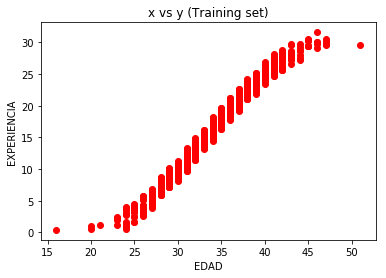

In [12]:
plt.scatter(dataset['EDAD'], dataset['EXPERIENCIA'], color = 'red')
#plt.plot(x, y, color = 'blue')
plt.title('x vs y (Training set)')
plt.xlabel('EDAD')
plt.ylabel('EXPERIENCIA')
plt.show()

## Defining the TARGET

In [13]:

target = [
    (eval_sin, 'EDAD', (-10,0.1,10), 1),
    (eval_line, 'GENERO', (-10,10), 1),
    (eval_sigmoid, 'NV_ESTUDIO', (-20,5/max(dataset['NV_ESTUDIO']),20), 1),
    (eval_sin, 'ESTUDIO_PREV', (-10,0.5,10), 0.5),
    (eval_sigmoid, 'EXPERIENCIA', (-20,5/max(dataset['EXPERIENCIA']),20), 1),
    (eval_sigmoid, 'MINUTES_DH', (-20,5/max(dataset['MINUTES_DH']),20), 1),
]

#print(len(target))

In [16]:
output = []
for relation in target:
    f, x, t, r = relation
    if len(output) == 0:
        output =  np.array([f(num,t,r) for num in dataset[x]])
    else:
        output = output + np.array([f(num,t,r) for num in dataset[x]])
        
output = output.round(0) + 70

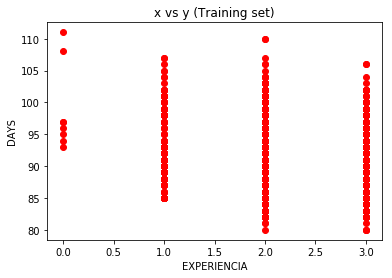

In [17]:
plt.scatter(dataset['NV_ESTUDIO'], output, color = 'red')
#plt.plot(x, y, color = 'blue')
plt.title('x vs y (Training set)')
plt.xlabel('EXPERIENCIA')
plt.ylabel('DAYS')
plt.show()

In [18]:
mu = output.mean()    
sigma =output.std()
print(mu,sigma)

91.469 5.848849374022211


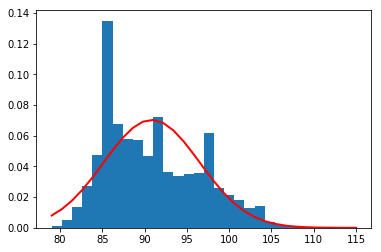

In [19]:
count, bins, ignored = plt.hist(output, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
linewidth=2, color='r')
plt.show()

## Encode numerical values into discrete variables

In [20]:
df_exp = dataset.copy()

In [21]:
cleanup_nums = {"GENERO":     {1: "MASCULINO", 0: "FEMENINO"},
                "RESIDENCIA": {2: "ARGENTINA", 1: "MEXICO", 0: "BRAZIL"},
                "NV_ESTUDIO": {3: "POST_GRADUATE",  2: "UNIVERSITARY", 1: "TERTIARY", 0: "HIGH_SCHOOL"},
                "ESTUDIO_PREV": {5: "BUSINESS", 4: "COMMERCIAL", 3: "ENGINEERING", 2: "DEVELOPMENT"
                                , 1: "MARKETING", 0: "OTHER"},
                "TRACK_DH": {3: "PROGRAMACION", 2: "DATA", 1: "EJECUTIVO", 0: "MARKETING"},
               }

In [22]:
df_exp.replace(cleanup_nums, inplace=True)
df_exp.head()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA
0,43.0,MASCULINO,ARGENTINA,POST_GRADUATE,ENGINEERING,PROGRAMACION,3.8,4557.9,28.7
1,42.0,FEMENINO,BRAZIL,UNIVERSITARY,COMMERCIAL,DATA,3.5,4656.2,25.6
2,35.0,FEMENINO,ARGENTINA,UNIVERSITARY,DEVELOPMENT,PROGRAMACION,4.0,4695.2,19.0
3,35.0,MASCULINO,MEXICO,TERTIARY,DEVELOPMENT,MARKETING,4.1,4778.2,18.4
4,36.0,MASCULINO,BRAZIL,POST_GRADUATE,COMMERCIAL,PROGRAMACION,4.0,4722.3,19.1


In [23]:
df_exp["NV_ESTUDIO"].value_counts()

UNIVERSITARY     604
POST_GRADUATE    240
TERTIARY         148
HIGH_SCHOOL        8
Name: NV_ESTUDIO, dtype: int64

## Adding some nulls

In [24]:
df_p = df_exp.mask(np.random.random(df_exp.shape)<0.15)
print(df_p.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
EDAD            861 non-null float64
GENERO          868 non-null object
RESIDENCIA      831 non-null object
NV_ESTUDIO      865 non-null object
ESTUDIO_PREV    862 non-null object
TRACK_DH        847 non-null object
AVG_DH          840 non-null float64
MINUTES_DH      836 non-null float64
EXPERIENCIA     855 non-null float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB
None


In [25]:
df_p["DIAS_EMP"] = output

In [26]:
df_p.to_csv('dh_validator_v2.csv')

In [27]:
df_p.head()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
0,43.0,MASCULINO,ARGENTINA,POST_GRADUATE,ENGINEERING,PROGRAMACION,3.8,4557.9,NaN,92.0
1,42.0,FEMENINO,BRAZIL,UNIVERSITARY,COMMERCIAL,DATA,3.5,4656.2,25.6,101.0
2,35.0,FEMENINO,ARGENTINA,UNIVERSITARY,DEVELOPMENT,NaN,4.0,4695.2,19.0,98.0
3,35.0,NaN,MEXICO,TERTIARY,DEVELOPMENT,MARKETING,4.1,4778.2,18.4,91.0
4,36.0,MASCULINO,NaN,POST_GRADUATE,COMMERCIAL,PROGRAMACION,4.0,4722.3,19.1,87.0
